# Neural Network for accident reconstruction

* Esta función se encarga de leer los archivos de datos y seleccionar aleatoriamente el conjunto de entrenamiento y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
entrada = pd.read_excel("Inputs.xlsx")
salida = pd.read_excel("Outputs.xlsx")
entradaData = entrada[entrada.columns[:-1]]
salidaData = salida[salida.columns[:-1]]

In [3]:
# Selección aleatoria de datos
detector = 0
while detector == 0:
    a = np.random.randn(len(entrada))
    check = (a<0.8)
    if sum(check) == 24:
        detector = 1
    else:
        detector = 0

input_training= entradaData[check]
input_testing = entradaData[~check]
output_training = salidaData[check]
output_testing = salidaData[~check]

In [4]:
salidaData[~check]

,v1ix,v1iy,v2ix,v2iy,e
0,15.60,0.10,6.70,0.20,0.19
16,2.20,-13.91,0.00,14.08,0.10
18,14.82,-8.56,0.00,11.77,0.10
19,17.86,0.00,0.00,9.11,0.09
21,-9.80,9.80,13.78,0.00,0.15


* Se establece la red neuronal 

In [52]:
from keras import *
from keras.layers import Dense
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import ELU
from keras.layers.advanced_activations import LeakyReLU

In [89]:
net = models.Sequential()
net.add(Dense(1000, input_shape = (16,), activation = 'tanh'))
net.add(Dense(500, activation = PReLU()))
net.add(Dense(500, activation = 'linear'))
net.add(Dense(5, activation = 'linear'))

In [90]:
net.compile(loss = 'mean_absolute_error',
            optimizer = 'adam',
            metrics = ["accuracy"])

In [91]:
history = net.fit(input_training, output_training, epochs = 100, batch_size = 6)

Epoch 1/100
4/4 [==============================] - 1s 12ms/step - loss: 6.0228 - accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 6.1697 - accuracy: 0.4556
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 5.3339 - accuracy: 0.4833
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 5.4198 - accuracy: 0.3778
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 4.7942 - accuracy: 0.4556
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 4.2007 - accuracy: 0.3722
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 5.0046 - accuracy: 0.4389
Epoch 8/100
4/4 [==============================] - 0s 20ms/step - loss: 4.8940 - accuracy: 0.3778
Epoch 9/100
4/4 [==============================] - 0s 23ms/step - loss: 4.6791 - accuracy: 0.3333
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 4.1601 - accuracy: 0.4889
Epoch 11/100
4/4 [=

dict_keys(['loss', 'accuracy'])


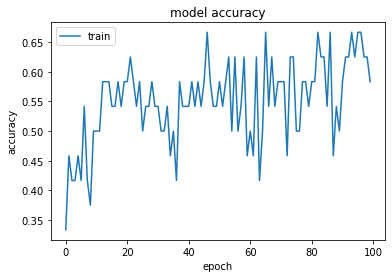

In [92]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

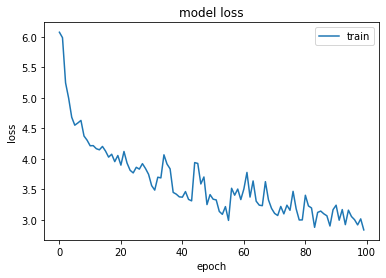

In [93]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [95]:
test_loss, test_acc = net.evaluate(input_testing, output_testing)

1/1 [==============================] - 0s 89ms/step - loss: 5.3092 - accuracy: 0.4000


In [96]:
output_testing[:2]

,v1ix,v1iy,v2ix,v2iy,e
0,15.6,0.10,6.7,0.20,0.19
16,2.2,-13.91,0.0,14.08,0.10


In [98]:
net.predict(input_testing[:2])

array([[ 0.563331  ,  9.498654  , 10.340449  , -1.8435686 , -0.2595969 ],
       [ 1.5425435 , -7.8135386 ,  1.0961024 ,  6.673124  ,  0.26340902]],
      dtype=float32)